In [1]:
import os
import sys
import librosa
import seaborn as sn
# sys.path.append(os.path.abspath(os.path.join('../')))
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"\\scripts")
from audio_loader import AudioLoader
from audio_manuplator import AudioManipulator
import visualize as vis
from results_pickler import ResultPickler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


## Load Audio files

In [2]:
al_train = AudioLoader(directory='../data/train')
# al_test = AudioLoader(directory="../data/test",tts_file=r'/trsTest.txt')


AudioExplorer:INFO->Successfully Created AudioExplorer Class
AudioExplorer:INFO->Successfully Loaded Audio and TTS files
AudioPreprocessor:INFO->Successfully Inherited AudioExplorer Class
AudioPreprocessor:INFO->Successfully Inherited AudioExplorer Class


In [3]:
df_train_audio_data = al_train.get_audio_info_with_data()
# df_test_audio_data = al_test.get_audio_info_with_data()
# rp = ResultPickler()
# rp.load_data("../models/LoadedAudioInfo.pkl")
# data_dict = rp.get_data()
# # data_dict.keys()
# df_train_audio_data = data_dict['TrainAudioInfoWithoutTTS']
df_train_audio_data


,Name,Duration,Channels,SamplingRate,TimeSeriesData,HasTTS
0,tr_10000_tr097082,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
1,tr_10001_tr097083,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
2,tr_10002_tr097084,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
3,tr_10003_tr097085,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
4,tr_10004_tr097086,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
...,...,...,...,...,...,...
995,tr_1108_tr12009,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
996,tr_1109_tr12010,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
997,tr_110_tr02010,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
998,tr_1110_tr12011,25.56,Mono,22500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True


In [4]:

# instantiate audio manuplator class
am_train = AudioManipulator(df_train_audio_data)


AudioPreprocessor:ERROR->successfully Initialized AudioPreprocessor class!
NoneType: None
AudioPreprocessor:ERROR->successfully Initialized AudioPreprocessor class!
NoneType: None


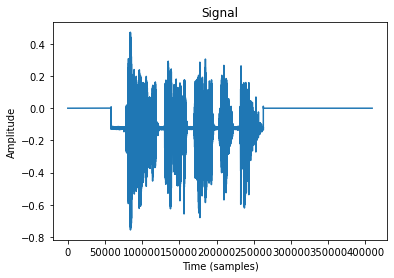

In [5]:
# Plot Time Series data of 
vis.plot_series(df_train_audio_data.loc[0,"TimeSeriesData"])


## Preprocessing the audio Data
- ### change the duration to the same size
- ### convert channels to stereo by duplicating the other channel
- ### standardize the sampling rate to the same one
- ### Data Augmentation
- ### Extract Features



### Convert Channels to Stereo by duplicating the other channel


In [6]:
am_train.convert_stereo_audio()
am_train.get_audio_info()

,Name,Duration,Channels,SamplingRate,TimeSeriesData,HasTTS
0,tr_10000_tr097082,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
1,tr_10001_tr097083,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
2,tr_10002_tr097084,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
3,tr_10003_tr097085,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
4,tr_10004_tr097086,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
...,...,...,...,...,...,...
995,tr_1108_tr12009,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
996,tr_1109_tr12010,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
997,tr_110_tr02010,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
998,tr_1110_tr12011,25.56,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True


In [7]:
# am_train.get_audio_info().head().loc[0,"TimeSeriesData"].shape
num_rows, y_len = am_train.get_audio_info().loc[0,"TimeSeriesData"].shape
num_rows,y_len

(2, 408960)

### Change the duration to the same size
From Our Data Exploration, we found that most frequent audio files has a duration between 2 to 6. And to reduce the bias, we will pad all the audio to make it equal in length with the maximum.

In [8]:
am_train.resize_audio()


In [9]:
am_train.get_audio_info()

,Name,Duration,Channels,SamplingRate,TimeSeriesData,HasTTS
0,tr_10000_tr097082,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
1,tr_10001_tr097083,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
2,tr_10002_tr097084,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
3,tr_10003_tr097085,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
4,tr_10004_tr097086,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
...,...,...,...,...,...,...
995,tr_1108_tr12009,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
996,tr_1109_tr12010,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
997,tr_110_tr02010,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
998,tr_1110_tr12011,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True


In [10]:
am_train.get_audio_info().loc[0,"TimeSeriesData"].shape

(2, 575100)

### Standardize Sampling Rate

In [11]:
# count sampling rate frequencies
pd.DataFrame({"count": df_train_audio_data.groupby("SamplingRate")["SamplingRate"].count()})


,count
SamplingRate,
22500,1000


In [12]:
am_train.resample_audio()

In [13]:
am_train.get_audio_info()

,Name,Duration,Channels,SamplingRate,TimeSeriesData,HasTTS
0,tr_10000_tr097082,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
1,tr_10001_tr097083,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
2,tr_10002_tr097084,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
3,tr_10003_tr097085,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
4,tr_10004_tr097086,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
...,...,...,...,...,...,...
995,tr_1108_tr12009,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
996,tr_1109_tr12010,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
997,tr_110_tr02010,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
998,tr_1110_tr12011,35.944,Stereo,22500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",True


### Our SamplingRate is the same all around our data but we have resampled it to 44100. Now we have our processed data, we will save the preprocessed files to a folder in a .wav format. 

 

In [ ]:
am_train.write_wave_files("../data/train/wav/")